# Homework 7

In this homework you will be training and using a "char-RNN". This is the name given to a character-level recurrent neural network language model by [this famous blog post by Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Before you start on the rest of the homework, please give the blog post a read, it's quite good!

I don't expect you to implement the char-RNN from scratch. Andrej's original char-rnn is in Torch (the predecessor to PyTorch that is not commonly used anymore). Fortunately, there are many other implementations of this model available; for example, there is one (in both mxnet and pytorch) in chapters 8 and 9 of [the textbook](http://d2l.ai), and another pytorch one [here](https://github.com/spro/char-rnn.pytorch). **Please use one of these example implementations (or another one that you find) when completing this homework**.

For this homework, please complete the following steps:

1. Download and tokenize the [Shakespeare dataset](http://www.gutenberg.org/files/100/100-0.txt) at a character level. I recommend basing your solution on the following code:
```Python
# Remove non-alphabetical characters, lowercase, and replace whitespace with ' '
raw_dataset = ' '.join(re.sub('[^A-Za-z ]+', '', text).lower().split())
# Maps token index to character
idx_to_char = list(set(raw_dataset))
# Maps character to token index
char_to_idx = dict([(char, i) for i, char in enumerate(idx_to_char)])
# Tokenize the dataset
corpus_indices = [char_to_idx[char] for char in raw_dataset]
```
1. Train a "vanilla" RNN (as described in chapter 8 of [the textbook](http://d2l.ai)) on the Shakespeare dataset. Report the training loss and generate some samples from the model at the end of training.
1. Train a GRU RNN (as described in chapter 9 of [the textbook](http://d2l.ai)) on the Shakespeare datatset. Is the final training loss higher or lower than the vanilla RNN? Are the samples from the model more or less realistic?
1. Find a smaller, simpler dataset than the Shakespeare data (you can find some ideas in Andrej's blog post, but feel free to get creative!) and train either the vanilla or GRU RNN on it instead. Is the final training loss higher or lower than it was for the Shakespeare data?

**Conclusion:**

The results of the Vanilla RNN model on the Shakespeare dataset are as follows:

![vrnn](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw7_data/Vanilla%20RNN%20Training%20Loss.png)

- The time spent on training was **3min 37s**.

- We can see that the fluctuation of the loss is very dramatic during the training process, and after 2000 epochs, the loss is reduced to about **1.9**.

Then, I set the start character to `wh` and the length of the generated samples to 200, and got 3 samples as follows:

```
Sample 1:  whoun's bolns swee. be do me, reng
in thee to then new, he all it, and in and am are must the samess a sife why, thou are the,
thy mill lock. whis.
         thee.

                                 

Sample 2:  whe kne, still gurains, and every we she of youpal look in you, o, the came of that he roperhers lew we stake my lo come i be harthen ever the cith and be ne a buicing heverss but surn-whicine. thy clam

Sample 3:  when it; good me bed
                      136_eas me stur somes, my shale will counter a do way i he a she my swee. and nnor thee you best hemser befor cork
i ato and herad coment the wom no, a speep

```

- We can find that the generated samples are not very good. There are a large number of words that are wrong, especially words that are slightly longer in length. The syntax of these sentences is also very bad, and the semantics are so poor that it is almost impossible to see what they are trying to express.



**Conclusion:**

The results of the GRU RNN model on the Shakespeare dataset are as follows:

![grurnn](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw7_data/GRU%20RNN%20Training%20Loss.png)

- The time spent on training was **5min 24s**. 
- The training time of GRU RNN is significantly longer than that of  Vanilla RNN, since GRU RNN has a more complex structure and more parameters.

- We can see that the fluctuation of the loss is also very dramatic during the training process. After 2000 epochs, the loss is reduced to about **1.8**.
- Relatively speaking, the loss of GRU RNN is slightly smaller than that of Vanilla RNN, but the difference is not very significant.

Similarly, I set the start character to `wh` and the length of the generated samples to 200, and got 3 samples as follows:

```
Sample 1:  whee a my the wordiaven
           arither? this that truce-days.
happs,
and as the for worrether can my faighter,
the secnaom dewet these but, so as for the will mard:
       sir one, a thou vieli

Sample 2:  whered hath i some frowned,
             wind this been the drus, thou fair this crove am, it so mearn any not hath man
    no she lord he wind? no mundace. the a copless,

   that him somed the she

Sample 3:  whis his this that by he manad, happ,
but
     thy duke i courn with forther, 'twordanded?
such suing empertaur but see of the agencar, no the shall that viled
    marted dischty my chary well consh

```

- We can find that the three generated samples are not very good either, with many wrong words, syntax errors, and unclear semantics. I was expecting more realistic samples generated by the GRU model, but found that it was not obvious.


**Conclusion:**

The smaller, simpler dataset I chose is from [Pytorch Tutorials](https://pytorch.org/tutorials/intermediate/char_rnn_generation_tutorial.html), and I only used the [`Chinese.txt`](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/blob/main/hw7_data/Chinese.txt) in it. This dataset records some Chinese names, and it has only 1247 total characters. And the names themselves are also very short. 

The results of the Vanilla RNN model on the Chinese Name dataset are as follows:

![vrnn](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw7_data/Vanilla%20RNN%20Training%20Loss%20of%20Chinese%20Names.png)

- The time spent on training was **3min 51s**.
- We can see that the fluctuations of loss on the Chinese Name dataset are significantly smaller than those on the Shakespeare dataset. After 2000 epochs, the loss is reduced to about **0.07**, which is lower than it was for the Shakespeare data.

Then, I set the start character to `na` and the length of the generated samples to 12, and got 3 samples as follows:

```
Sample 1: 
nao
shao
shaw


Sample 2: 
nao
chen
cheng

Sample 3: 
na
hiu
hong
ho

```

- We can find more than half of the samples look like Chinese names.
- The model performs significantly better on the Chinese Name dataset than on the Shakespeare dataset, regardless of the loss values or the degree of reality of the generated samples. This may be due to the fact that the names themselves are simpler than sentences or paragraphs.

**Conclusion:** 

The results of the GRU RNN model on the Chinese Name dataset are as follows:

![grurnn](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw7_data/GRU%20RNN%20Training%20Loss%20of%20Chinese%20Names.png)

- The time spent on training was **5min 29s**. 
- Similarly, the training time of GRU RNN is significantly longer than that of Vanilla RNN, since GRU RNN has a more complex structure and more parameters.

- Obviously, the loss curve of the GRU RNN model is better and smoother than that of the Vanilla RNN model on the Chinese Name dataset. After 2000 epochs, the loss is reduced to about **0.04**, which is lower than it was for the Vanilla RNN model, and it is lower than it was for the Shakespeare data.

Similarly, I set the start character to `na` and the length of the generated samples to 12, and got 3 samples as follows:

```
Sample 1: 
nang
luo
mah
m

Sample 2: 
nang
zhao
zhen

Sample 3: 
nang
jin
jing
```

- There are also more than half of the samples that look like Chinese names.
- Therefore, whether it is the Vanilla RNN or the GRU RNN, the performance on the Chinese Name dataset is significantly better than the performance on the Shakespeare dataset.


## Code

### Prepare Data

In [ ]:
import requests
import random
import re

import torch
import torch.nn as nn
from torch.autograd import Variable

# Shakespeare dataset
# filename = "https://www.gutenberg.org/files/100/100-0.txt"

# Chinese Names dataset
filename = "https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw7_data/Chinese.txt"

file = requests.get(filename)
file = file.text

# Or read local file
# file = open('shakespeare.txt').read()

In [ ]:
# Remove non-alphabetical characters, lowercase, and replace whitespace with ' '
# file = ' '.join(re.sub('[^A-Za-z ]+', '', file).lower().split())
# file = ''.join(re.sub('[^A-Za-z ]+', '', file).lower().split())


# I find that unidecode works better
!pip install Unidecode
import unidecode
file = unidecode.unidecode(file).lower()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# all different charcters in the dataset
all_characters = ''.join(set(file))
all_characters

'kzlcas-:jiboqrxynpugedhtw\n mf'

In [ ]:
# Number of different characters in the dataset
n_characters = len(set(file))
n_characters

29

In [ ]:
# length of the dataset
file_len = len(file)
file_len

1247

In [ ]:
# To make inputs out of this big string of data, we will be splitting it into chunks
chunk_len = 200

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

e 
seow
seto
sha
shan
shang
shao
shaw
she
shen
sheng
shi
shu
shuai
shui
shum
siew
siu
song
sum
sun
sze 
tan
tang
tao
teng
teoh
thean
thian
thien
tian
tong
tow
tsang
tse
tsen
tso
tze
wan
wang
wei
wen
we


In [ ]:
# Turn string into list of token index
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('abcd'))

tensor([ 4, 10,  3, 21])


In [ ]:
# Assemble a pair of input and target tensors for training from a random chunk
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

random_training_set()

(tensor([19, 25,  3, 22, 20, 24, 25,  3, 22,  9, 20, 18, 25,  3, 22,  9, 16, 25,
          3, 22, 11, 16, 19, 25,  3, 22, 11, 18, 25,  3, 22, 18, 25,  3, 18,  9,
         25, 21,  4,  9, 25, 21, 20, 16, 19, 25, 21,  9, 16, 19, 25, 21, 11, 16,
         19, 25, 21, 11, 18, 25, 21, 18,  4, 16, 25, 20, 16, 19, 25, 28,  4, 16,
         25, 28, 20,  9, 25, 28, 20, 16, 19, 25, 28, 11, 11, 16, 19, 25, 28, 18,
         16, 19, 25, 19,  4, 16, 25, 19,  4, 18,  0, 25, 19, 20, 16, 19, 25, 19,
          9, 27, 25, 19, 11,  0, 25, 19, 11, 16, 19, 25, 19, 18,  4, 16, 25, 19,
         18,  4, 16, 19, 25, 19, 18, 11, 25, 19, 24, 11,  3,  0, 25, 22,  4, 16,
         25, 22,  4, 16, 19, 25, 22,  4, 11, 25, 22, 20, 24, 25, 22,  9, 18, 25,
         22, 11, 16, 19, 25, 22, 11, 13, 25, 22,  5,  9,  4, 11, 25, 22, 18,  4,
         25, 22, 18,  4, 16, 25, 22, 18,  4, 16, 19, 25, 22, 18,  9, 25, 22, 18,
          9, 20]),
 tensor([25,  3, 22, 20, 24, 25,  3, 22,  9, 20, 18, 25,  3, 22,  9, 16, 25,  3,
         

### Build the RNN Model

This model will take as input the character for step $t_{-1}$ and is expected to output the next character $t$. There are three layers - one linear layer that encodes the input character into an internal state, one vanilla RNN layer or GRU RNN layer that operates on that internal state and a hidden state, and a decoder layer that outputs the probability distribution.

In [ ]:
# Vanilla RNN or GRU RNN
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)

        # ------------------ GRU RNN ------------------
        # GRU RNN
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        
        # ------------------ Vanilla RNN --------------
        # Vanilla RNN
        # self.rnn = nn.RNN(hidden_size, hidden_size, n_layers)

        self.decoder = nn.Linear(hidden_size, output_size)
    

    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))

        # ------------------ GRU RNN ------------------
        # GRU RNN
        output, hidden = self.gru(input.view(1, 1, -1), hidden)

        # ------------------ Vanilla RNN --------------
        # Vanilla RNN
        # output, hidden = self.rnn(input.view(1, 1, -1), hidden)

        output = self.decoder(output.view(1, -1))
        return output, hidden


    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

### Train

In [ ]:
# define the training parameters
hidden_size = 100
n_layers = 1
lr = 0.005

# instantiate the model
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [ ]:
# A helper to print the amount of time passed
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [ ]:
# Training function
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    target = target.reshape(-1, 1)

    for c in range(chunk_len-1):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c])

    loss.backward()
    decoder_optimizer.step()

    # print(loss.item())
    return loss.item() / chunk_len

In [ ]:
# train
start = time.time()
all_losses = []
loss_avg = 0

n_epochs = 2000
print_every = 100

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())
    
    if epoch % print_every == 0:
        print('%s (%d %d%%) %.4f' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
    
    all_losses.append(loss)

0m 26s (100 5%) 0.7024
0m 43s (200 10%) 0.2602
1m 0s (300 15%) 0.1318
1m 15s (400 20%) 0.0492
1m 31s (500 25%) 0.0328
1m 47s (600 30%) 0.0644
2m 6s (700 35%) 0.0454
2m 22s (800 40%) 0.0268
2m 38s (900 45%) 0.0274
2m 54s (1000 50%) 0.0484
3m 11s (1100 55%) 0.0425
3m 26s (1200 60%) 0.0744
3m 42s (1300 65%) 0.0301
3m 59s (1400 70%) 0.0416
4m 16s (1500 75%) 0.0528
4m 31s (1600 80%) 0.0366
4m 47s (1700 85%) 0.0236
5m 4s (1800 90%) 0.0276
5m 20s (1900 95%) 0.0332
5m 36s (2000 100%) 0.0407


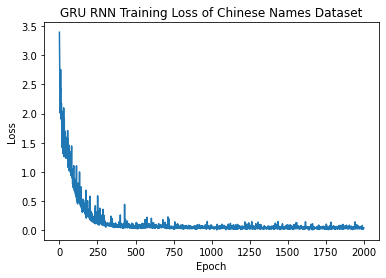

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU RNN Training Loss of Chinese Names Dataset')
plt.show()

### Prediction

In [ ]:
# Predict
def predict(prime_str='a', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)

    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [ ]:
# Generate samples for Shakespeare dataset
# for i in range(3):
#     print('Sample %d: ' %(i+1), predict('wh', 200))
#     print()

In [ ]:
# Generate samples for Chinese Names dataset
for i in range(3):
    print('Sample %d: ' %(i+1))
    print(predict('na', 12))
    print()

Sample 1: 
nang
luo
mah
m

Sample 2: 
nang
zhao
zhen

Sample 3: 
nang
jin
jing




**References:**
- [Practical PyTorch: Generating Shakespeare with a Character-Level RNN](https://github.com/spro/practical-pytorch/tree/master/char-rnn-generation)
- [NLP From Scratch: Generating Names with a Character-Level RNN](https://pytorch.org/tutorials/intermediate/char_rnn_generation_tutorial.html)